In [ ]:
! pip install numpy as np
! pip install scikit-learn
! pin install pandas
! pin install matplotlib

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpreprocess
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from google.colab import files
from sklearn.metrics import mean_absolute_error, r2_score
from matplotlib import pyplot as plt

## DATA Uploading

In [2]:
uploaded1 = files.upload()
file_name1 = list(uploaded1.keys())[0]


Saving lag3_per_df_clean_nomissing.csv to lag3_per_df_clean_nomissing.csv


In [3]:
uploaded2 = files.upload()
file_name2 = list(uploaded2.keys())[0]

Saving lag4_per_df_clean_nomissing.csv to lag4_per_df_clean_nomissing.csv


In [5]:
uploaded3 = files.upload()
file_name3 = list(uploaded3.keys())[0]

Saving lag5_per_df_clean_nomissing.csv to lag5_per_df_clean_nomissing.csv


In [6]:
#read data with pandas dataframe
data1=pd.read_csv(file_name1)
data2=pd.read_csv(file_name2)
data3=pd.read_csv(file_name3)

In [7]:
#create list of three lagged dataset
dataset=[]
dataset.append(data1)
dataset.append(data2)
dataset.append(data3)

In [8]:
# sorted datast based on years
for data in dataset:
  data.sort_values('Year', ignore_index = True, inplace = True)
  display(data.sample())


,Year,DeathRatePer100K,Population,GDP,GDPPerCapita,InflationRate,EmploymentPopulationRatio,RegionCode1,RegionCode2,RegionCode3,...,Country1,Country2,Country3,Country4,Country5,Country6,Country7,lag1,lag2,lag3
1806,2021,22.627723,19000988.0,1.970000e+11,10373.78979,8.042321,65.651,0,0,0,...,0,1,0,1,1,0,0,23.369176,26.203242,27.893231


,Year,DeathRatePer100K,Population,GDP,GDPPerCapita,InflationRate,EmploymentPopulationRatio,RegionCode1,RegionCode2,RegionCode3,...,Country2,Country3,Country4,Country5,Country6,Country7,lag1,lag2,lag3,lag4
1430,2017,23.503744,7393200.0,3.410000e+11,46160.42979,1.493872,59.213,0,0,0,...,0,1,0,1,0,0,26.206206,27.906136,26.177237,28.461841


,Year,DeathRatePer100K,Population,GDP,GDPPerCapita,InflationRate,EmploymentPopulationRatio,RegionCode1,RegionCode2,RegionCode3,...,Country3,Country4,Country5,Country6,Country7,lag1,lag2,lag3,lag4,lag5
1015,2012,39.538998,16792090.0,2.080000e+11,12386.69927,5.097915,66.985,0,0,0,...,0,1,1,0,0,42.164414,45.403256,49.506741,52.421161,55.237543


# Modeling
## Loss Function and Evaluation Metrics

* Mean Square Error (MSE): Loss function

$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
* R^2:  


$$1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
* Mean Absolute Error(MAE)

$$ \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

## Baseline Models: Polynominal Regression for No Legged Dataset
Models for regular polynomial regression where lag features are not included.

In [9]:
# Drop Lag features
print(data1.columns)
no_lag_data= data1.drop(columns=['lag1', 'lag2', 'lag3'])

Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'lag1', 'lag2', 'lag3'],
      dtype='object')


In [10]:
#Polynominal Regressions from degree = 1 to 5
degrees = [p for p in range(1, 6)]

y_no_lag = no_lag_data['DeathRatePer100K']
X_no_lag= no_lag_data.drop(columns=['DeathRatePer100K', 'Year'])

X_train, X_test, y_train, y_test = train_test_split(X_no_lag, y_no_lag, test_size=0.2, random_state=42)

regular_linear_train_error={}

regular_linear_test_error={}

regular_linear_train_error['mse'] = []
regular_linear_train_error['r2'] = []
regular_linear_train_error['mae'] = []

regular_linear_test_error['mse'] = []
regular_linear_test_error['r2'] = []
regular_linear_test_error['mae'] = []

for degree in degrees:

    poly_transform = skpreprocess.PolynomialFeatures(degree=degree)

    # Initialize sci-kit linear regression model
    X_train_poly = poly_transform.fit_transform(X_train)


    # Initialize sci-kit linear regression model
    model_linear = LinearRegression()

    # Train linear regression model
    model_linear.fit(X_train_poly, y_train)

    #Test model on training set
    predictions_train = model_linear.predict(X_train_poly)

    print('Results for linear regression model with degree {} polynomial expansion'.format(degree))
    print('Traing Errors for linear regression model with degree {} polynomial expansion'.format(degree))
    train_mse = mean_squared_error(y_train, predictions_train)
    print('Training set mse: {:.4f}'.format(train_mse))

    train_r2 = r2_score(y_train, predictions_train)
    print('Training set R2: {:.4f}'.format(train_r2))

    train_mae = mean_absolute_error(y_train, predictions_train)
    print('Training set mae: {:.4f}'.format(train_mae))


    #save training
    regular_linear_train_error['mse'].append(train_mse)
    regular_linear_train_error['mae'].append(train_mae)
    regular_linear_train_error['r2'].append(train_r2)

    print('Test Errors for linear regression model with degree {} polynomial expansion'.format(degree))
    X_test_poly = poly_transform.transform(X_test)
    predictions_test = model_linear.predict(X_test_poly)

    test_mse = mean_squared_error(y_test, predictions_test)
    print('Test set mse: {:.4f}'.format(test_mse))

    test_r2 = r2_score(y_test, predictions_test)
    print('Test set r2: {:.4f}'.format(test_r2))

    test_mae = mean_absolute_error(y_test, predictions_test)
    print('Test set mae: {:.4f}'.format(test_mae))

    #save test data
    regular_linear_test_error['mse'].append(test_mse)
    regular_linear_test_error['mae'].append(test_mae)
    regular_linear_test_error['r2'].append(test_r2)


Results for linear regression model with degree 1 polynomial expansion
Traing Errors for linear regression model with degree 1 polynomial expansion
Training set mse: 239.7120
Training set R2: 0.1879
Training set mae: 11.8180
Test Errors for linear regression model with degree 1 polynomial expansion
Test set mse: 266.1668
Test set r2: 0.0872
Test set mae: 12.0149
Results for linear regression model with degree 2 polynomial expansion
Traing Errors for linear regression model with degree 2 polynomial expansion
Training set mse: 270.8069
Training set R2: 0.0826
Training set mae: 12.5469
Test Errors for linear regression model with degree 2 polynomial expansion
Test set mse: 262.9808
Test set r2: 0.0981
Test set mae: 12.1641
Results for linear regression model with degree 3 polynomial expansion
Traing Errors for linear regression model with degree 3 polynomial expansion
Training set mse: 282.0496
Training set R2: 0.0445
Training set mae: 12.6227
Test Errors for linear regression model with 

In [12]:
#Help function to plot.
def plot_results(axis,
                 x_values,
                 y_values,
                 labels,
                 colors,
                 x_limits,
                 x_label,
                 y_label):

    for x, y, label, color in zip(x_values, y_values, labels, colors):
        axis.plot(x, y, marker='o', color=color, label=label)
        axis.legend(loc='best')

    # Set x and y limits
    axis.set_xlim(x_limits)
    axis.set_xticks(range(0, max(max(x_values)) + 1))


    # Set x and y labels
    axis.set_xlabel(x_label)
    axis.set_ylabel(y_label)

Text(0.5, 0.98, 'Regular Polynominal Regression with Various Degrees of Polynomial Expansions')

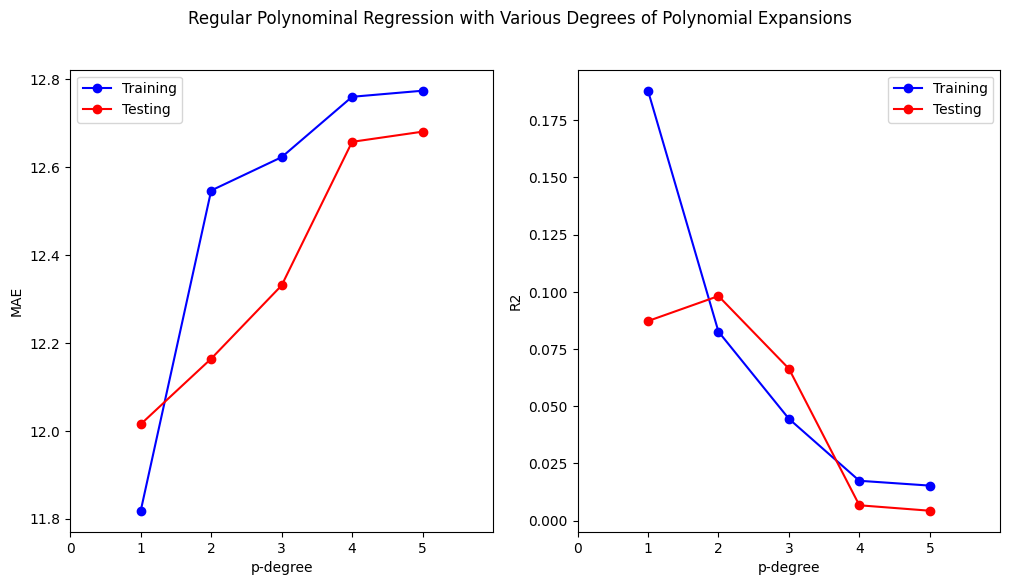

In [17]:
#plot
labels = ['Training', 'Testing']
colors = ['blue', 'red']
x_values = [degrees] * 2

regular_train_errors_mae = np.array(regular_linear_train_error['mae'])
regular_test_errors_mae = np.array(regular_linear_test_error['mae'])

regular_train_errors_r2 = np.array(regular_linear_train_error['r2'])
regular_test_errors_r2 = np.array(regular_linear_test_error['r2'])

lag3_y_values_mae = [regular_train_errors_mae,regular_test_errors_mae]
lag3_y_values_r2 = [regular_train_errors_r2,regular_test_errors_r2]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot_results(
    axis=ax1,
    x_values=x_values,
    y_values=lag3_y_values_mae ,
    labels=labels,
    colors=colors,
    x_limits=[0, len(degrees)+1],
    x_label='p-degree',
    y_label='MAE')

plot_results(
    axis=ax2,
    x_values=x_values,
    y_values=lag3_y_values_r2 ,
    labels=labels,
    colors=colors,
    x_limits=[0, len(degrees)+1],
    x_label='p-degree',
    y_label='R2')

plt.suptitle('Regular Polynominal Regression with Various Degrees of Polynomial Expansions')

## Polynominal Regression models for times series data

## Time-Series Split
 For time series data, walk-forward split methods should be applied. `sklearn.model_selection.TimeSeriesSplit()` provides the walk-forward split functionality for time series data. You can find more information about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).


In [14]:
# five tiems cross-validation split
n_splits = 5
tscv = TimeSeriesSplit(n_splits)

## Setting a Baseline For Evaluation Metrics
For time-series modeling evaluation, it's important to set up an evaluation baseline. The model should aim to outperform the baseline evaluation metrics


In [15]:
base_mae_3dataset={
    'mse':[],
    'r2':[],
    'mae':[]
}


for i , data in enumerate(dataset):
  y_base = data['DeathRatePer100K']
  X_base= data.drop(columns=['DeathRatePer100K', 'Year'])

  base_mae_3dataset['lag'+str(i+3)] = []
  cv_mae=[]
  cv_mse=[]
  cv_r2=[]
  for train_index, test_index in tscv.split(X_base):
    x_train_base, x_test_base = X_base.iloc[train_index], X_base.iloc[test_index]
    y_train_base, y_test_base = y_base.iloc[train_index], y_base.iloc[test_index]

    r2s=[]
    mses =[]
    maes=[]
    for j in range(1, i+4):
      lag_column = 'lag' + str(j)
      maes.append(mean_absolute_error(y_test_base, x_test_base[lag_column].values))
      mses.append(mean_squared_error(y_test_base, x_test_base[lag_column].values))
      r2s.append(r2_score(y_test_base, x_test_base[lag_column].values))
    cv_mae.append(min(maes))
    cv_mse.append(min(mses))
    cv_r2.append(max(r2s))

  average_mae_cv = np.mean(cv_mae)
  average_r2_cv = np.mean(cv_r2)
  average_mse_cv = np.mean(cv_mse)
  print(f'lag{i+3} dataset MSE Baselines : {average_mse_cv:.4f}')
  print(f'lag{i+3} dataset MAE Baselines : {average_r2_cv:.4f}')
  print(f'lag{i+3} dataset MAE Baselines : {average_mae_cv:.4f}')

  base_mae_3dataset['mse'].append(average_mse_cv)
  base_mae_3dataset['mae'].append(average_mae_cv)
  base_mae_3dataset['r2'].append(average_r2_cv)


lag3 dataset MSE Baselines : 7.5856
lag3 dataset MAE Baselines : 0.9673
lag3 dataset MAE Baselines : 1.7571
lag4 dataset MSE Baselines : 7.4119
lag4 dataset MAE Baselines : 0.9665
lag4 dataset MAE Baselines : 1.7483
lag5 dataset MSE Baselines : 7.0012
lag5 dataset MAE Baselines : 0.9687
lag5 dataset MAE Baselines : 1.7164


In [16]:
 base_mae_3dataset['mae']

[1.757100888518033, 1.748279276214533, 1.7164364924175826]

## Lagged Polynonibal Regression

In [20]:
results_dict_test = {}
results_dict_train = {}

degrees = [p for p in range(1, 6)]


for i , data in enumerate(dataset):
  data_key = 'lag'+str(i+3)
  results_dict_train[data_key] = {}
  results_dict_test[data_key] = {}
  y_poly = data['DeathRatePer100K']
  X_poly = data.drop(columns=['DeathRatePer100K', 'Year'])


  for degree in degrees:
    poly_transform = skpreprocess.PolynomialFeatures(degree=degree)

    results_dict_train[data_key][degree]={
        'mse': [],
        'r2': [],
        'mae': []
    }

    results_dict_test[data_key][degree]={
        'mse': [],
         'r2': [],
        'mae': []

    }

    poly_mse_scores_train = []
    poly_mse_scores_test = []

    poly_r2_scores_train = []
    poly_r2_scores_test = []

    poly_mae_scores_train = []
    poly_mae_scores_test= []


    for train_index, test_index in tscv.split(X_poly):
      x_train, x_test = X_poly.iloc[train_index], X_poly.iloc[test_index]
      y_train, y_test = y_poly.iloc[train_index], y_poly.iloc[test_index]

      x_poly_train = poly_transform.fit_transform(x_train)

      # Initialize sci-kit linear regression model
      ts_model_linear = LinearRegression()

      # Train linear regression model
      ts_model_linear.fit(x_poly_train, y_train)


      #Test model on training set
      predictions_train = ts_model_linear.predict(x_poly_train)

      #calculate different types of train errors
      score_mse_linear_train = mean_squared_error(y_train, predictions_train)
      score_mae_linear_train = mean_absolute_error(y_train, predictions_train)
      score_r2_linear_train = r2_score(y_train, predictions_train)


      # Save training errors scores
      poly_mse_scores_train.append(score_mse_linear_train)
      poly_mae_scores_train.append(score_mae_linear_train)
      poly_r2_scores_train.append(score_r2_linear_train)

      # Test model on testing set
      x_poly_test = poly_transform.transform(x_test)
      predictions_test = ts_model_linear.predict(x_poly_test)

      #calculate different types of test errors
      score_mse_linear_test = mean_squared_error(y_test, predictions_test)
      score_mae_linear_test = mean_absolute_error(y_test, predictions_test)
      score_r2_linear_test = r2_score(y_test, predictions_test)


      # Save training errors scores
      poly_mse_scores_test.append(score_mse_linear_test)
      poly_mae_scores_test.append(score_mae_linear_test)
      poly_r2_scores_test.append(score_r2_linear_test)


    # Calculate the average errors across all folds

    print(f'lag{i+3} dataset for Results for linear regression model with degree {degree} polynomial expansion')

    # training errors
    print(f'lag{i+3} dataset for Training Results for linear regression model with degree {degree} polynomial expansion')

    poly_average_mse_train = np.mean(poly_mse_scores_train)
    print(f'lag{i+3} dataset Average MSE :{poly_average_mse_train:.4f}')
    poly_average_r2_train = np.mean(poly_r2_scores_train)
    print(f'lag{i+3} dataset Average R2 :{poly_average_r2_train:.4f}')
    poly_average_mae_train = np.mean(poly_mae_scores_train)
    print(f'lag{i+3} dataset Average MAE :{poly_average_mae_train:.4f}')


    #save lag dataset training error
    results_dict_train[data_key][degree]['mse'].append(poly_average_mse_train)
    results_dict_train[data_key][degree]['mae'].append(poly_average_mae_train)
    results_dict_train[data_key][degree]['r2'].append(poly_average_r2_train)


    # testing errors
    print(f'lag{i+3} dataset for Test Results for linear regression model with degree {degree} polynomial expansion')

    poly_average_mse_test= np.mean(poly_mse_scores_test)
    print(f'lag{i+3} dataset Average MSE :{poly_average_mse_test:.4f}')
    poly_average_r2_test = np.mean(poly_r2_scores_test)
    print(f'lag{i+3} dataset Average r2 :{poly_average_r2_test:.4f}')
    poly_average_mae_test = np.mean(poly_mae_scores_test)
    print(f'lag{i+3} dataset Average MAE :{poly_average_mae_test:.4f}')

    #save lag dataset testing error
    results_dict_test[data_key][degree]['mse'].append(poly_average_mse_test)
    results_dict_test[data_key][degree]['mae'].append(poly_average_mae_test)
    results_dict_test[data_key][degree]['r2'].append(poly_average_r2_test)



lag3 dataset for Results for linear regression model with degree 1 polynomial expansion
lag3 dataset for Training Results for linear regression model with degree 1 polynomial expansion
lag3 dataset Average MSE :9.4722
lag3 dataset Average R2 :0.9758
lag3 dataset Average MAE :1.9194
lag3 dataset for Test Results for linear regression model with degree 1 polynomial expansion
lag3 dataset Average MSE :6.9533
lag3 dataset Average r2 :0.9703
lag3 dataset Average MAE :1.7276
lag3 dataset for Results for linear regression model with degree 2 polynomial expansion
lag3 dataset for Training Results for linear regression model with degree 2 polynomial expansion
lag3 dataset Average MSE :317.8798
lag3 dataset Average R2 :0.1893
lag3 dataset Average MAE :13.1769
lag3 dataset for Test Results for linear regression model with degree 2 polynomial expansion
lag3 dataset Average MSE :267.1722
lag3 dataset Average r2 :-0.0813
lag3 dataset Average MAE :12.3332
lag3 dataset for Results for linear regressio

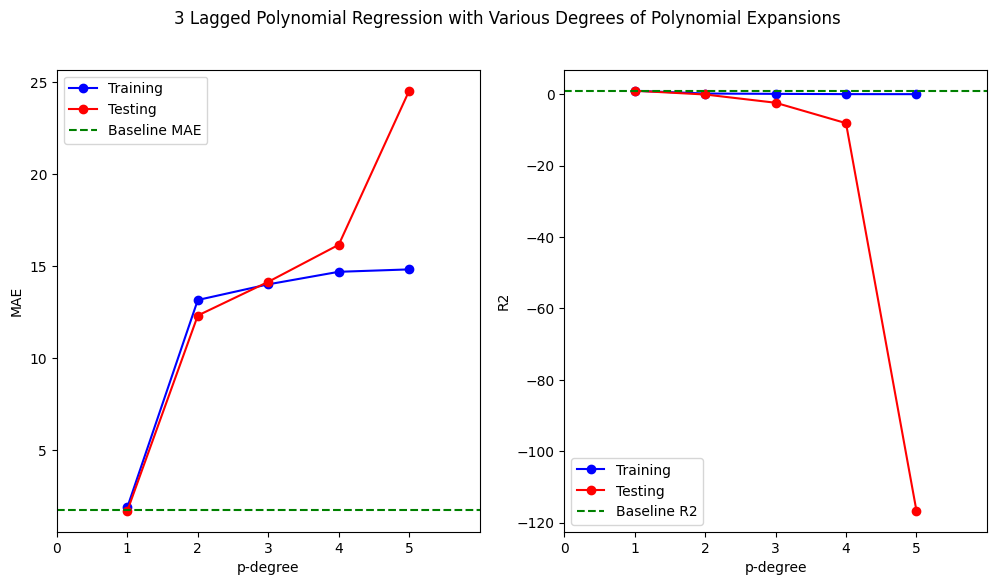

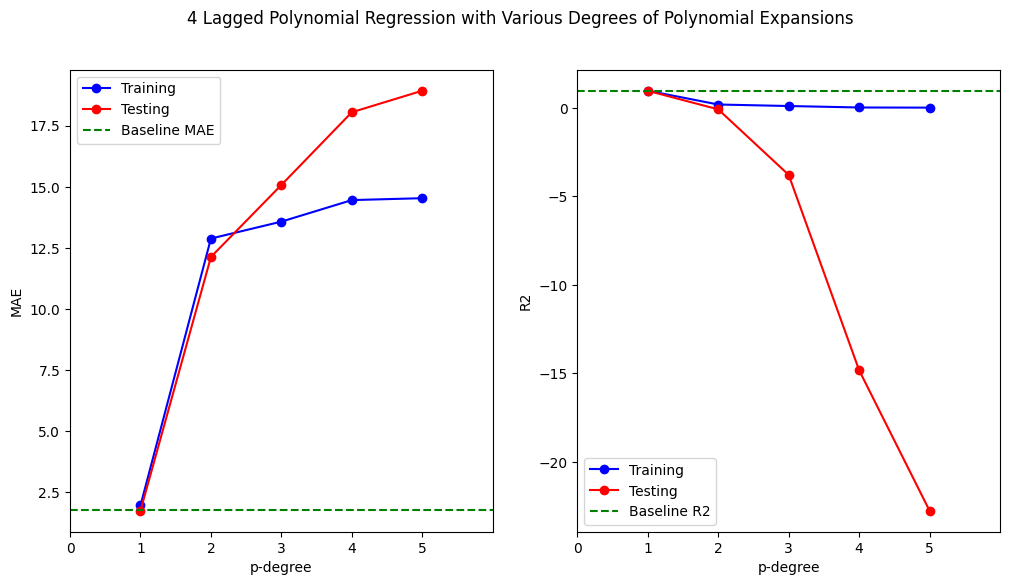

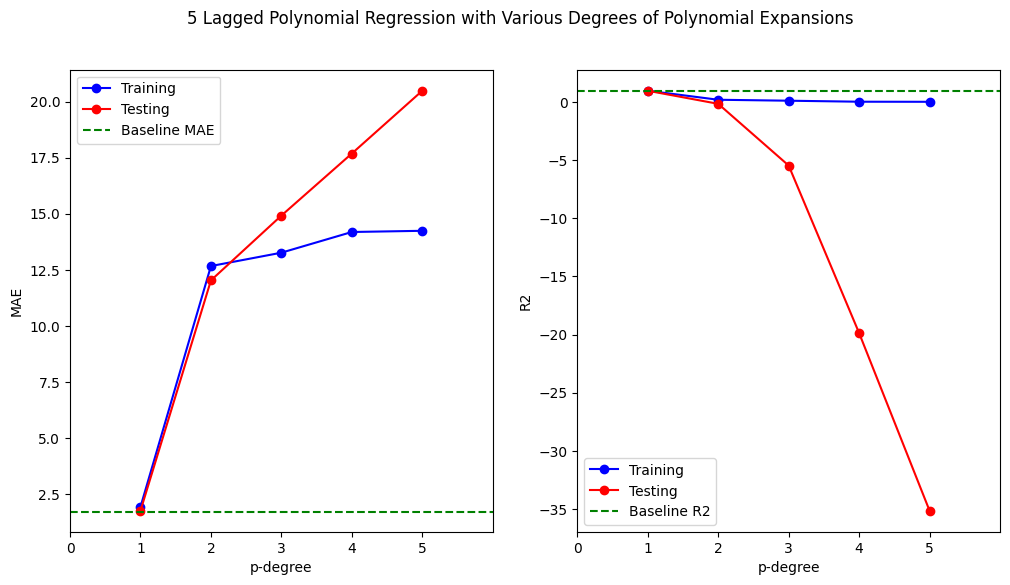

In [30]:
# create subplots for each data set to plot evaluation for training and testing
labels = ['Training', 'Testing']
colors = ['blue', 'red']
x_values = [degrees] * 2

for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    dic_key = 'lag' + str(i+3)
    mae_train_errors = np.array([results_dict_train[dic_key][degree]['mae'] for degree in degrees])
    mae_test_errors = np.array([results_dict_test[dic_key][degree]['mae'] for degree in degrees])
    r2_train_errors = np.array([results_dict_train[dic_key][degree]['r2'] for degree in degrees])
    r2_test_errors = np.array([results_dict_test[dic_key][degree]['r2'] for degree in degrees])

    mae_y_values = [mae_train_errors, mae_test_errors]
    r2_y_values = [r2_train_errors, r2_test_errors]

    plot_results(
        axis=ax1,
        x_values=x_values,
        y_values=mae_y_values,
        labels=labels,
        colors=colors,
        x_limits=[0, len(degrees) + 1],
        x_label='p-degree',
        y_label='MAE')

    plot_results(
        axis=ax2,
        x_values=x_values,
        y_values=r2_y_values,
        labels=labels,
        colors=colors,
        x_limits=[0, len(degrees) + 1],
        x_label='p-degree',
        y_label='R2')

    ax1.axhline(y=base_mae_3dataset['mae'][i], color='g', linestyle='--', label='Baseline MAE')
    ax2.axhline(y=base_mae_3dataset['r2'][i], color='g', linestyle='--', label='Baseline R2')
    ax1.legend()
    ax2.legend()
    plt.suptitle(f'{i+3} Lagged Polynomial Regression with Various Degrees of Polynomial Expansions')


## Ridge Lagged Regression

In [17]:
#RidgeRegression Class created for assingment
class RidgeRegression(object):

    def __init__(self):
        # Define private variables
        self.__weights = None

    def __fit_normal_equation(self, X, y, weight_decay=0):
        '''
        Fits the model to x and y via normal equation

        Arg(s):
            X : numpy
                N x d feature vector
            y : numpy
                N x 1 ground-truth label
            weight_decay : float
                weight of weight decay term
        '''

        # TODO: Implement the __fit_normal_equation function

        # TODO: Compute (X^T X)
        # X_t_X = X.T @ X
        X_t_X = np.matmul(X.T, X)

        # TODO: Create identity matrix X transpose X -> d x d
        I = np.eye(X.shape[-1])

        # TODO: Compute (X^T X + \lambda I)^-1
        X_t_X_lambda_inverse = np.linalg.inv(X_t_X + weight_decay * I)

        # Normal equation: (X^T X + \lambda I)^-1 X^T y
        self.__weights = np.matmul(np.matmul(X_t_X_lambda_inverse, X.T), y)

    def fit(self, X, y, weight_decay=0, solver='normal_equation'):
        '''
        Fits the model to x and y by solving least squares
        using normal equation

        Arg(s):
            X : numpy[float32]
                N x d feature vector
            y : numpy[float32]
                N ground-truth label
            weight_decay : float
                weight of weight decay term
            solver : str
                solver types: normal_equation
        '''

        y = np.expand_dims(y, axis=1)

        # TODO: Implement the fit function

        if solver == 'normal_equation':
            self.__fit_normal_equation(X, y, weight_decay=weight_decay)
        else:
            raise ValueError('Encountered unsupported solver: {}'.format(solver))

    def predict(self, X):
        '''
        Predicts the real value for each feature vector x

        Arg(s):
            x : numpy[float32]
                N x d feature vector
        Returns:
            numpy[float32] : N x 1 real value vector (\hat{y})
        '''

        # TODO: Implement the predict function

        # predictions = X @ self._weights
        predictions = np.matmul(X, self.__weights)
        return predictions

In [31]:
weight_decays = [np.power(10, p) for p in range(0, 5)]
print(weight_decays)
degree = 1


[1, 10, 100, 1000, 10000]


In [38]:
ridge_results_dict_test = {}
ridge_results_dict_train = {}

for weight_decay in weight_decays:

  data = dataset[0]

  # y value: since I create difference already for the first dataset
  y_poly_ridge= data['DeathRatePer100K']

  X_poly_ridge = data.drop(columns=['DeathRatePer100K', 'Year'])


  poly_transform = skpreprocess.PolynomialFeatures(degree=degree)

  ridge_results_dict_train[weight_decay]={
      'mse': [],
      'mae': [],
      'r2': [],
  }

  ridge_results_dict_test[weight_decay]={
      'mse': [],
      'mae': [],
      'r2': [],
  }

  ridge_mse_scores_train = []
  ridge_mse_scores_test = []

  ridge_r2_scores_train = []
  ridge_r2_scores_test = []

  ridge_mae_scores_train = []
  ridge_mae_scores_test= []


  for train_index, test_index in tscv.split(X_poly_ridge):
    x_train, x_test = X_poly_ridge.iloc[train_index], X_poly_ridge.iloc[test_index]
    y_train, y_test = y_poly_ridge.iloc[train_index], y_poly_ridge.iloc[test_index]

    x_ridge_train = poly_transform.fit_transform(x_train)

    # Initialize sci-kit linear regression model
    ts_model_ridge = RidgeRegression()

    # Train linear regression model
    ts_model_ridge.fit(x_ridge_train, y_train, weight_decay=weight_decay)


    #Test model on training set
    predictions_train = ts_model_ridge.predict(x_ridge_train)

    #calculate different types of train errors
    score_mse_linear_train = mean_squared_error(y_train, predictions_train)
    score_mae_linear_train = mean_absolute_error(y_train, predictions_train)
    score_r2_linear_train = r2_score(y_train, predictions_train)


    # Save training errors scores
    ridge_mse_scores_train.append(score_mse_linear_train)
    ridge_mae_scores_train.append(score_mae_linear_train)
    ridge_r2_scores_train.append(score_r2_linear_train)

    # Test model on testing set
    x_ridge_test = poly_transform.transform(x_test)
    predictions_test = ts_model_ridge.predict(x_ridge_test)

    #calculate different types of test errors
    score_mse_scores_test = mean_squared_error(y_test, predictions_test)
    score_mae_scores_test = mean_absolute_error(y_test, predictions_test)
    score_r2_scores_test = r2_score(y_test, predictions_test)


    # Save test errors scores
    ridge_mse_scores_test.append(score_mse_scores_test)
    ridge_mae_scores_test.append(score_mae_scores_test)
    ridge_r2_scores_test.append(score_r2_scores_test)


  # Calculate the average errors across all folds

  print(f'lag2 dataset for Results for ridge regression model with degree {degree} polynomial expansion')

  # training errors
  print(f'lag2 dataset for Training Results for ridge regression model with degree {degree} polynomial expansion')

  ridge_average_mse_train = np.mean(ridge_mse_scores_train)
  print(f'lag2 dataset Average MSE :{ridge_average_mse_train:.5f}')
  ridge_average_r2_train = np.mean(ridge_r2_scores_train)
  print(f'lag2 dataset Average R2 :{ridge_average_r2_train:.5f}')
  ridge_average_mae_train = np.mean(ridge_mae_scores_train)
  print(f'lag2 dataset Average MAE :{ridge_average_mae_train :.5f}')


  #save lag dataset training error
  ridge_results_dict_train[weight_decay]['mse'].append(ridge_average_mse_train)
  ridge_results_dict_train[weight_decay]['mae'].append(ridge_average_mae_train)
  ridge_results_dict_train[weight_decay]['r2'].append(ridge_average_r2_train)


  # testing errors
  print(f'lag2 dataset for Test Results for linear regression model with degree {degree} polynomial expansion')
  ridge_average_mse_test= np.mean(ridge_mse_scores_test)
  print(f'lag2 dataset Average MSE :{ridge_average_mse_test:.5f}')
  ridge_average_r2_test = np.mean(ridge_r2_scores_test)
  print(f'lag2 dataset Average r2 :{ridge_average_r2_test:.5f}')
  ridge_average_mae_test = np.mean(ridge_mae_scores_test)
  print(f'lag2 dataset Average MAE :{ridge_average_mae_test:.5f}')

  #save lag dataset testing error

  ridge_results_dict_test[weight_decay]['mse'].append(ridge_average_mse_test)
  ridge_results_dict_test[weight_decay]['mae'].append(ridge_average_mae_test)
  ridge_results_dict_test[weight_decay]['r2'].append(ridge_average_r2_test)


lag2 dataset for Results for ridge regression model with degree 1 polynomial expansion
lag2 dataset for Training Results for ridge regression model with degree 1 polynomial expansion
lag2 dataset Average MSE :9.47259
lag2 dataset Average R2 :0.97579
lag2 dataset Average MAE :1.91884
lag2 dataset for Test Results for linear regression model with degree 1 polynomial expansion
lag2 dataset Average MSE :6.94459
lag2 dataset Average r2 :0.97033
lag2 dataset Average MAE :1.72579
lag2 dataset for Results for ridge regression model with degree 1 polynomial expansion
lag2 dataset for Training Results for ridge regression model with degree 1 polynomial expansion
lag2 dataset Average MSE :9.48028
lag2 dataset Average R2 :0.97577
lag2 dataset Average MAE :1.91680
lag2 dataset for Test Results for linear regression model with degree 1 polynomial expansion
lag2 dataset Average MSE :6.91515
lag2 dataset Average r2 :0.97042
lag2 dataset Average MAE :1.72046
lag2 dataset for Results for ridge regressio

In [33]:
labels = ['Training', 'Testing']
colors = ['blue', 'red']
x_values = [list(range(5)), list(range(5))]

Text(0.5, 0.98, 'Lagged Ridge Linear Regression with Various Weight Decays')

<Figure size 640x480 with 0 Axes>

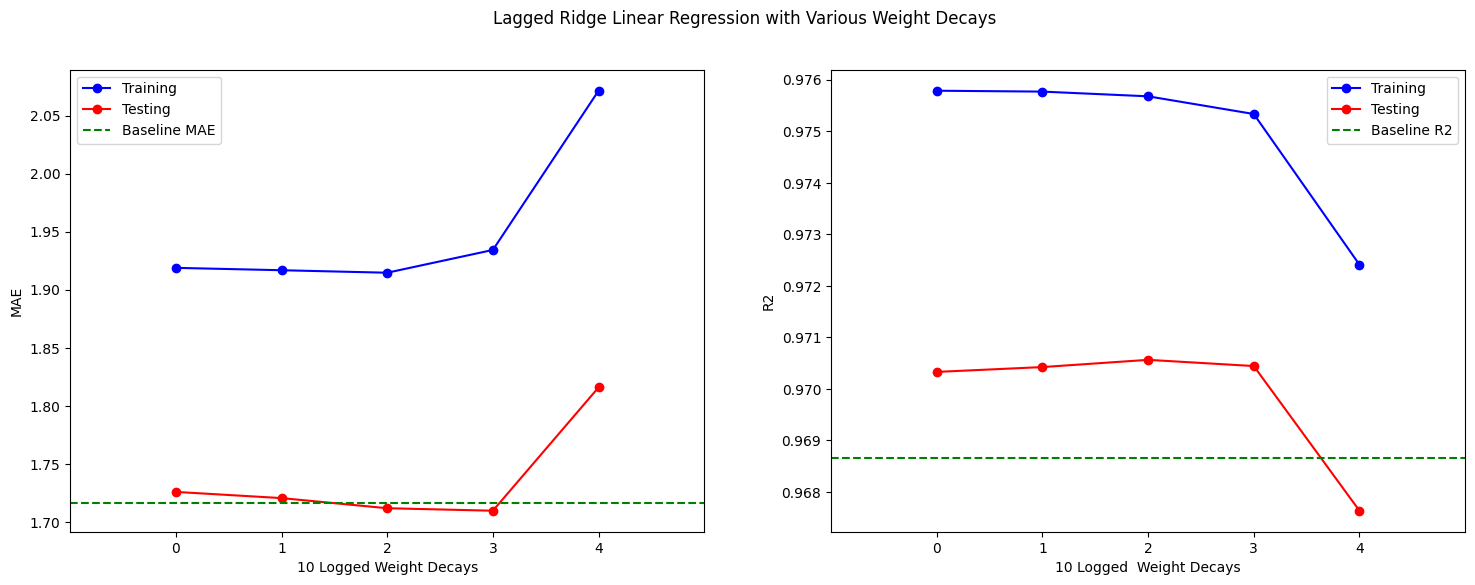

In [37]:
mae_ridge_train_errors = np.array([ridge_results_dict_train[weight_decay]['mae'] for weight_decay in weight_decays])
mae_ridge_test_errors = np.array([ridge_results_dict_test[weight_decay]['mae'] for weight_decay in weight_decays])
r2_ridge_train_errors = np.array([ridge_results_dict_train[weight_decay]['r2'] for weight_decay in weight_decays])
r2_ridge_test_errors = np.array([ridge_results_dict_test[weight_decay]['r2'] for weight_decay in weight_decays])
mae_y_values_ridge = [mae_ridge_train_errors, mae_ridge_test_errors ]
r2_y_values_ridge = [r2_ridge_train_errors, r2_ridge_test_errors ]



fig = plt.figure()  # Create a figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

plot_results(
      axis=ax1,
      x_values=x_values,
      y_values=mae_y_values_ridge,
      labels=labels,
      colors=colors,
      x_limits=[-1, max(x_values[0]) + 1],
      x_label='10 Logged Weight Decays',
      y_label='MAE')

plot_results(
    axis=ax2,
    x_values=x_values,
    y_values=r2_y_values_ridge,
    labels=labels,
    colors=colors,
    x_limits=[-1, max(x_values[0]) + 1],
    x_label='10 Logged  Weight Decays',
    y_label='R2')

ax1.legend()
ax2.legend()

ax1.axhline(y=base_mae_3dataset['mae'][i], color='g', linestyle='--', label='Baseline MAE')
ax2.axhline(y=base_mae_3dataset['r2'][i], color='g', linestyle='--', label='Baseline R2')
ax1.legend()
ax2.legend()

plt.suptitle('Lagged Ridge Linear Regression with Various Weight Decays')

## Alternative Algorithms: RandomForestRegressor for time series data

In [31]:
#HyperParameters
n_estimator=1000
random_state=43

max_depth = 8
min_samples_split=5
min_samples_leaf=2


In [33]:
rfr_result_train={}
rfr_result_test={}


for i , data in enumerate(dataset):
  y_rfr = data['DeathRatePer100K']
  X_rfr = data.drop(columns=['DeathRatePer100K', 'Year'])

  key = 'lag' + str(i+3)
  rfr_result_train[key] = {
    'mae': [],
    'mse': [],
    'r2': []}

  rfr_result_test[key] = {
  'mae': [],
  'mse': [],
  'r2': []}

  rfr_mae_scores_train = []
  rfr_mse_scores_train = []
  rfr_r2_scores_train = []

  rfr_mae_scores_test = []
  rfr_mse_scores_test = []
  rfr_r2_scores_test = []

  for train_index, test_index in tscv.split(X_rfr):
    X_train, X_test = X_rfr.iloc[train_index], X_rfr.iloc[test_index]
    y_train, y_test = y_rfr.iloc[train_index], y_rfr.iloc[test_index]

    rf_regressor = RandomForestRegressor(n_estimators=n_estimator,
                                         random_state=random_state,
                                         max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf)
    rf_regressor.fit(X_train, y_train)

    # train-results
    y_pred = rf_regressor.predict(X_train)
    #mse
    mse = mean_squared_error(y_train, y_pred)
    rfr_mse_scores_train.append(mse)
    #mae
    mae = mean_absolute_error(y_train, y_pred)
    rfr_mae_scores_train.append(mae)
    #r2
    r2 = r2_score(y_train, y_pred)
    rfr_r2_scores_train.append(r2)


    # test-restults
    y_pred = rf_regressor.predict(X_test)

    #mse
    mse = mean_squared_error(y_test, y_pred)
    rfr_mse_scores_test.append(mse)
    #mae
    mae = mean_absolute_error(y_test, y_pred)
    rfr_mae_scores_test.append(mae)
    #r2
    r2 = r2_score(y_test, y_pred)
    rfr_r2_scores_test.append(r2)

  #train result after cv
  rfr_average_mse_train =np.mean(rfr_mse_scores_train)
  rfr_average_mae_train=np.mean(rfr_mae_scores_train)
  rfr_average_r2_train=np.mean(rfr_r2_scores_train)

  # Calculate the average errors across all folds

  print(f'lag{i+3} dataset for Results for Random Forest regression model')

  # training errors
  print(f'lag{i+3} dataset for Training Results for Random Forest regression model')

  print(f'lag{i+3} dataset Average MSE :{rfr_average_mse_train:.5f}')
  print(f'lag{i+3} dataset Average MAE :{rfr_average_mae_train:.5f}')
  print(f'lag{i+3} dataset Average R2 :{rfr_average_r2_train:.5f}')
  # save
  rfr_result_train[key]['mse'].append(rfr_average_mae_train)
  rfr_result_train[key]['mae'].append(rfr_average_mae_train)
  rfr_result_train[key]['r2'].append(rfr_average_mae_train)

  # test result after cv
  rfr_average_mse_test =np.mean(rfr_mse_scores_test)
  rfr_average_mae_test=np.mean(rfr_mae_scores_test)
  rfr_average_r2_test=np.mean(rfr_r2_scores_test)
  # save
  rfr_result_test[key]['mse'].append(rfr_average_mae_test)
  rfr_result_test[key]['mae'].append(rfr_average_mae_test)
  rfr_result_test[key]['r2'].append(rfr_average_mae_test)

  # test errors
  print(f'lag{i+3} dataset for test Results for Random Forest regression model')

  print(f'lag{i+3} dataset Average MSE :{rfr_average_mse_test:.5f}')
  print(f'lag{i+3} dataset Average MAE :{rfr_average_mae_test:.5f}')
  print(f'lag{i+3} dataset Average R2 :{rfr_average_r2_test:.5f}')




lag3 dataset for Results for Random Forest regression model
lag3 dataset for Training Results for Random Forest regression model
lag3 dataset Average MSE :3.31273
lag3 dataset Average MAE :1.13313
lag3 dataset Average R2 :0.99150
lag3 dataset for test Results for Random Forest regression model
lag3 dataset Average MSE :7.60928
lag3 dataset Average MAE :1.81236
lag3 dataset Average R2 :0.96755
lag4 dataset for Results for Random Forest regression model
lag4 dataset for Training Results for Random Forest regression model
lag4 dataset Average MSE :3.16506
lag4 dataset Average MAE :1.10197
lag4 dataset Average R2 :0.99157
lag4 dataset for test Results for Random Forest regression model
lag4 dataset Average MSE :7.87541
lag4 dataset Average MAE :1.81966
lag4 dataset Average R2 :0.96564
lag5 dataset for Results for Random Forest regression model
lag5 dataset for Training Results for Random Forest regression model
lag5 dataset Average MSE :3.12036
lag5 dataset Average MAE :1.07557
lag5 datase